In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import load

In [5]:
np.linspace(0.043,0.16,num=20)

array([0.043     , 0.04915789, 0.05531579, 0.06147368, 0.06763158,
       0.07378947, 0.07994737, 0.08610526, 0.09226316, 0.09842105,
       0.10457895, 0.11073684, 0.11689474, 0.12305263, 0.12921053,
       0.13536842, 0.14152632, 0.14768421, 0.15384211, 0.16      ])

In [2]:
def check_constraint(Aw1, Aw2, Aw3, Aw4, S, x1, x22, x3, n):
    lhs = np.zeros((n,))
    #for a in range(da):
    #H1_debug = np.dot(S * (Aw1 - Aw1_hat[a]), x1)
    H1 = np.dot(S * (Aw1), x1)
    H2 = np.dot(S * (Aw2), x22)
    H3 = (Aw3) * x3
    H4 = (Aw4)
    H20= np.zeros((n,))
    H21= np.zeros((n,))
    H22= np.zeros((n,))
    for i in range(n):
        #if a == A_ix[i]:
        #    continue
        lhs[i] = H1[i,0] + H2[i,0] + H3[i,0] + H4[i,0]
        if x22[i,0] == 1.0:
            a_ix = np.argmax(A[i,:])
            if a_ix == 0:
                H20[i] = H2[i,0]
            elif a_ix == 1:
                H21[i] = H2[i,0]
            else:
                H22[i] = H2[i,0]
    return lhs, H20, H21, H22


# load data
sim = 5#15
frac = 1
_, y, S, X, A, _ = load.get_data(sim, 0)
_, _, _, _, A_frac, _ = load.get_data(sim, 1)
(n,n) = S.shape
da = A.shape[-1]
int_on = 2
x1 = X[:,0].reshape(n,1)
x2 = X[:,1].reshape(n,1)
x3 = X[:,2].reshape(n,1)


# load weights
if frac:
    DICT = np.load('school_weights_linear_mse_sim' + str(sim) + '_max1_frac.npz')
else:
    DICT = np.load('school_weights_linear_mse_sim' + str(sim) + '_max1.npz')
weights = DICT['w'].T
# get weight matrix, for x2 
w1 = weights[0:da,:]
w2 = weights[da:da*2,:]                                                                                     
w3 = weights[da*2:da*3,:]
w4 = weights[da*3:da*4,:]
#x_int = np.zeros((n,))

# # DEPRICATED
# if int_on == 1:
#     #ix = (x1 == 0)
#     weight_int = w1                                                                                         
#     #x_int = x1                                                                                              
#     H = S * np.dot(A,w1)                                                                                    
# elif int_on == 2:
#     #ix = (x2 == 0)
#     weight_int = w2                                                                                         
#     #x_int = x2                                                                                              
#     H = S * np.dot(A,w2) # (n,n)                                                                            
# elif int_on == 3:
#     #ix = (x3 == 0)                                                                                          
#     weight_int = w3
#     #x_int = x3
#     H = np.dot(A,w3) # (n,1)                                                                                
# else:
#     print('err')
# #inds = np.where(ix == True)[0]
# # DEPRICATED
    
Aw1 = np.dot(A, w1)
Aw2 = np.dot(A, w2)
Aw3 = np.dot(A, w3)
Aw4 = np.dot(A, w4)


Aw1_frac = np.dot(A_frac, w1)
Aw2_frac = np.dot(A_frac, w2)
Aw3_frac = np.dot(A_frac, w3)
Aw4_frac = np.dot(A_frac, w4)

In [15]:
len(np.linspace(0.13, 0.28, num=20)[2:])
#[round(a,2) for a in np.linspace(0.15, 0.28, num=20)]

18

In [48]:
w2

array([[0.01668268],
       [0.04726144],
       [0.15377   ]], dtype=float32)

In [ ]:
tau = np.linspace(0.10, 0.18, num=9)
K = [5, 10, 50]
DICT = np.load('results/unfair_k' + str(K[2]) + '_' + str(tau[1]) + '.npz')
sol_unfair = DICT['sol']
np.sum(A,axis=0)#inds[np.where(sol_unfair == 1.0)[0]],:],axis=0)

In [3]:
# NOTE: all that matters here is A_added and obj
def get_obj_and_A(filename, int_on, Aw1, Aw2, Aw3, Aw4, S, x2, x3, n, A):
    DICT = np.load(filename)
    sol = DICT['sol']
    added = np.where(sol == 1.0)[0]
    x_int = np.zeros((n,1))
    #pdb.set_trace()
    #print(len(added))
    if len(added) > 0:
        x_int[added,0] = 1
    if int_on == 1:
        obj, H20, H21, H22 = check_constraint(Aw1, Aw2, Aw3, Aw4, S, x_int, x2, x3, n)
    elif int_on == 2:
        obj, H20, H21, H22 = check_constraint(Aw1, Aw2, Aw3, Aw4, S, x1, x_int, x3, n)
    elif int_on == 3:
        obj, H20, H21, H22 = check_constraint(Aw1, Aw2, Aw3, Aw4, S, x1, x2, x_int, n)
    else:
        print('wrong')
    A_total = np.sum(A, axis=0)
    A_added = np.sum(A[added,:], axis=0)
    A_perc  = A_added / A_total
    #pdb.set_trace()
    return obj, A_total, A_added, A_perc, sol, H20, H21, H22

tau = np.linspace(0.13, 0.28, num=20)
tau = np.linspace(0.04,0.16, num=20)
#tau = tau[2:]
K = [25]
#A_inds = A[inds,:]

fair_perc = np.zeros((len(tau),3))
fair_added= np.zeros((len(tau),3))
fair_obj  = np.zeros((len(tau),))
for k in range(len(K)):
    print('k=' + str(K[k]))
    for t in range(len(tau)):
        print('tau=' + str(tau[t]))
        #filename = 'results/new_unfair_k' + str(K[k]) + '_' + str(tau[t]) + '_sim' + str(sim) + '_int' + str(int_on) + '.npz'
        #obj, A_total, A_added, A_perc, sol, H20, H21, H22 = get_obj_and_A(filename, int_on, Aw1, Aw2, Aw3, Aw4, S, x2, x3, n, A)
        
        filename = 'results/new_fair_k' + str(K[k]) + '_' + str(tau[t]) + '_sim' + str(sim) + '_int' + str(int_on) + '.npz'
        obj_fair, A_total_fair, A_added_fair, A_perc_fair, sol_fair, h20, h21, h22 = get_obj_and_A(filename, int_on, Aw1, Aw2, Aw3, Aw4, S, x2, x3, n, A)
        fair_added[t,:]= A_added_fair
        fair_perc[t,:] = A_perc_fair
        fair_obj[t] = np.sum(obj_fair)
        #print(A_added)
        #print(A_added_fair)
        #print(np.sum(obj_fair))
        #print(sol_fair)
        #if t >= 2:
        #    pdb.set_trace()
        #if len(sol_fair) != 0:
        #    pdb.set_trace()

k=25
tau=0.04
tau=0.04631578947368421
tau=0.05263157894736842
tau=0.05894736842105263
tau=0.06526315789473684
tau=0.07157894736842105
tau=0.07789473684210527
tau=0.08421052631578947
tau=0.09052631578947368
tau=0.0968421052631579
tau=0.10315789473684212
tau=0.1094736842105263
tau=0.11578947368421053
tau=0.12210526315789474
tau=0.12842105263157894
tau=0.13473684210526315
tau=0.14105263157894737
tau=0.14736842105263157
tau=0.15368421052631578
tau=0.16


In [ ]:
len(tau)

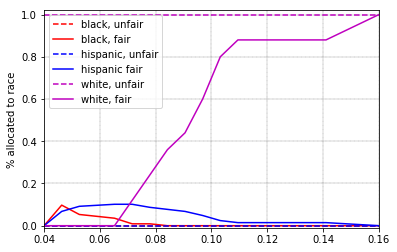

In [4]:
fig, ax = plt.subplots()
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
plt.plot(tau, np.repeat(A_perc[0], len(tau)), '--r')
plt.plot(tau, fair_perc[:,0], '-r')
plt.plot(tau, np.repeat(A_perc[1], len(tau)), '--b')
plt.plot(tau, fair_perc[:,1], '-b')
plt.plot(tau, np.repeat(A_perc[2], len(tau)), '--m')
plt.plot(tau, fair_perc[:,2], '-m')
plt.legend(['black, unfair', 'black, fair', 'hispanic, unfair', 'hispanic fair', 'white, unfair', 'white, fair'], loc='upper left')
ax.grid(color='k', linestyle='--', linewidth=0.25)
plt.axis([tau[0], tau[-1], -0.01, 1.02])
plt.ylabel('% allocated to race')
#plt.xlabel(r"$\displaystyle\tau$",fontsize=16)
plt.show()
#plt.savefig('linear_K25_race_alloc_sim5.pdf', bbox_inches='tight')

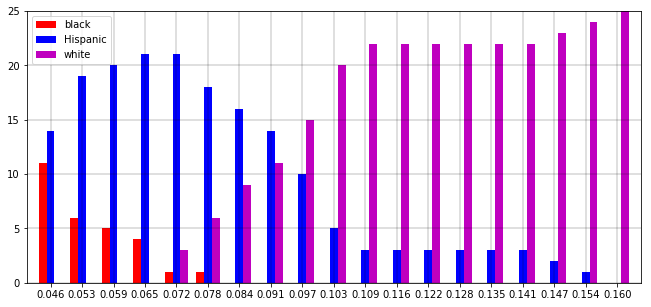

In [10]:
fig, ax = plt.subplots(figsize=(11, 5))
#ind = np.arange(0,36,2)
ind = np.arange(0,40,2)[1:]
ax.grid(color='k', linestyle='-', linewidth=0.25)
width = 0.5
p1 = ax.bar(ind, fair_added[1:,0], width, color='r')
p2 = ax.bar(ind+width, fair_added[1:,1], width, color='b')
p3 = ax.bar(ind+width*2, fair_added[1:,2], width, color='m')
#ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
#labs = ["%.3f" % round(a,3) for a in tau]
labs = ["%.3f" % round(a,3) for a in np.linspace(0.04, 0.16, 20)[1:]]
ax.set_xticklabels(labs)
#ax.set_yticklabels(np.arange(0,50,5))

plt.yticks(np.arange(0,26,5))
#plt.axis([-1, 36, 0, 25])
plt.axis([1, 40, 0, 25])
ax.legend((p1[0], p2[0], p3[0]), ('black', 'Hispanic', 'white'))
#ax.yaxis.set_units(inch)
#ax.autoscale_view()
plt.show()
#plt.savefig('bar_K25_linear_race_alloc_sim5.pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(0.65, 5))
ind = np.zeros((1,))#np.arange(0,40,2)
ax.grid(color='k', linestyle='-', linewidth=0.25)
width = 0.5
p1 = ax.bar(ind, A_added[0], width, color='r')
p2 = ax.bar(ind+width, A_added[1], width, color='b')
p3 = ax.bar(ind+width*2, A_added[2], width, color='m')
#ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
labs = ["%.2f" % round(a,2) for a in np.linspace(0.04, 0.16, 20)]
ax.set_xticklabels('')#labs)
#ax.set_yticklabels('')
#ax.set_yticklabels(np.arange(0,50,5))

plt.yticks(np.arange(0,51,5))
plt.axis([-0.5, 1.5, 0, 50])#40, 0, 50])
#ax.legend((p1[0], p2[0], p3[0]), ('black, unfair', 'hispanic, unfair', 'white, unfair'), loc='upper left')
#ax.yaxis.set_units(inch)
#ax.autoscale_view()
#plt.show()
plt.savefig('bar_unfair_linear_race_alloc_sim5.pdf', bbox_inches='tight')
#plt.savefig('bar_max_race_alloc_sim5.pdf', bbox_inches='tight')

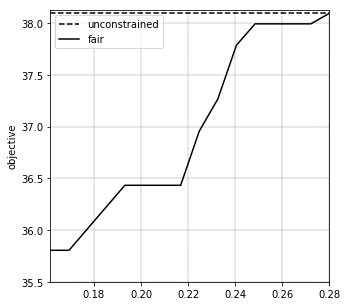

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(tau[2:], np.repeat(np.sum(obj), len(tau[2:])), '--k')
plt.plot(tau[2:], fair_obj[2:], '-k')
plt.legend(['unconstrained', 'fair'], loc='upper left')
ax.grid(color='k', linestyle='--', linewidth=0.25)
plt.axis([tau[2], tau[-1], 35.5,38.13])
#plt.xticks(np.linspace(0.16,0.28,12))
plt.ylabel('objective')
#plt.show()
plt.savefig('linear_K25_race_obj_sim5.pdf', bbox_inches='tight')

In [ ]:
fair_obj[2:]

In [ ]:
fair_perc[:,0]

In [ ]:
fair_obj[2:]

# MAX MODEL!!!!!!! JUST USE THIS!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import load

In [2]:
# load data
sim = 5
frac = 1
print('sim=' + str(sim))
print('frac=' + str(frac)) 
_, _, S, X, A, neigh  = load.get_data(sim, 0)
_, _, _, _, A_frac, _  = load.get_data(sim, 1)
n = S.shape[0]
da = A.shape[-1]
if frac:
    DICT = np.load('school_weights_linear_mse_sim' + str(sim) + '_max1_frac.npz')
else:
    DICT = np.load('school_weights_linear_mse_sim' + str(sim) + '_max1.npz')
w = DICT['w'].T

# get weight matrix, for x2
w1 = w[0:da,:]
w2 = w[da:da*2,:]
w3 = w[da*2:da*3,:]
w4 = w[da*3:da*4,:]
neigh = neigh.astype(int)
# we just care about int_on for now
x1 = X[:,0]#.reshape(n,1)
x3 = X[:,2]#.reshape(n,1)
K=25
A_ix = np.argmax(A,axis=1)


def EY(index,solution,a):
    #pdb.set_trace()
    neighS = S[index,neigh[index,:]]
    if MAX:
        first  = w1[a]*np.max(neighS*x1[neigh[index,:]])                                                 
        second = w2[a]*np.max(neighS*solution[neigh[index,:]].astype(float))                                                               
    else:
        first  = w1[a]*np.sum(neighS*x1[neigh[index,:]])                                                 
        second = w2[a]*np.sum(neighS*solution[neigh[index,:]].astype(float))                                                               
    third  = w3[a]*x3[index]
    fourth = w4[a]
    return first + second + third + fourth

def EY_inner(index,solution,a):
    neighS = S[index,neigh[index,:]]
    first  = np.dot(a,w1)*np.max(neighS*x1[neigh[index,:]])
    second = np.dot(a,w2)*np.max(neighS*solution[neigh[index,:]].astype(float))
    third  = np.dot(a,w3)*x3[index]
    fourth = np.dot(a,w4)
    return first + second + third + fourth





# TAUS = np.linspace(0.04, 0.16, 20)
# TAU_DIFF = TAUS[1]-TAUS[0]
# bb = [0.04-(a*TAU_DIFF) for a in np.arange(1,2)]
# bb = np.flip(bb,axis=0)
# cc = [0.16+(a*TAU_DIFF) for a in np.arange(1,5)]
# TAUS = np.concatenate((bb,TAUS,cc))

DICT = np.load('results/TAUS_frac.npz')
TAUS = DICT['TAUS']
C = len(TAUS)

f_obj = np.zeros((C,))
f_perc = np.zeros((C,3))
count = 0
A_total = np.sum(A,axis=0)
f_added = np.zeros((C,3))
#pdb.set_trace()
print(TAUS)
for Tau in TAUS:
    print(Tau)
    if frac:
        filename = 'results/max_fair_k' + str(K) + '_' + str(Tau) + '_sim' + str(sim) + '_frac.npz'
    else:
        filename = 'results/max_fair_k' + str(K) + '_' + str(Tau) + '_sim' + str(sim) + '.npz'
    DICT = np.load(filename)
    sol = DICT['sol']
    if np.sum(sol) > 0:
        for i in range(n):
            if frac:
                f_obj[count] += EY_inner(i,sol,A_frac[np.newaxis,i,:])#A_ix[i])
            else:
                f_obj[count] += EY(i,sol,A_ix[i])
        A_added = np.sum(A[sol,:],axis=0)
        f_added[count,:] = A_added
        f_perc[count,:]  = A_added / A_total
    count += 1

if frac:
    filename = 'results/max_fair_k' + str(K) + '_' + str(TAUS[-1]) + '_sim' + str(sim) + '_frac.npz'
else:
    filename = 'results/max_fair_k' + str(K) + '_' + str(TAUS[-1]) + '_sim' + str(sim) + '.npz'
DICT = np.load(filename)
u_sol = DICT['sol']
u_obj = 0.0
#u_perc = np.zeros((1,3))
for i in range(n):
    if frac:
        u_obj += EY_inner(i,u_sol,A_frac[np.newaxis,i,:])
    else:
        u_obj += EY(i,u_sol,A_ix[i])
u_added = np.sum(A[u_sol,:],axis=0)
u_perc  = u_added / A_total

sim=5
frac=1
[0.03368421 0.04       0.04631579 0.05263158 0.05894737 0.06526316
 0.07157895 0.07789474 0.08421053 0.09052632 0.09684211 0.10315789
 0.10947368 0.11578947 0.12210526 0.12842105 0.13473684 0.14105263
 0.14736842 0.15368421 0.16       0.16631579 0.17263158 0.17894737
 0.18526316]
0.03368421052631579
0.04
0.04631578947368421
0.05263157894736842
0.05894736842105263
0.06526315789473684
0.07157894736842105
0.07789473684210527
0.08421052631578947
0.09052631578947368
0.0968421052631579
0.10315789473684212
0.1094736842105263
0.11578947368421053
0.12210526315789474
0.12842105263157894
0.13473684210526315
0.14105263157894737
0.14736842105263157
0.15368421052631578
0.16
0.16631578947368422
0.1726315789473684
0.17894736842105263
0.18526315789473685


In [36]:
DICT = np.load('results/max_fair_k' + str(K) + '_' + str(TAUS[-2]) + '_sim' + str(sim) + '_frac.npz')

In [37]:
np.sum(DICT['sol'])

25

In [38]:
TAUS

array([0.03368421, 0.04      , 0.04631579, 0.05263158, 0.05894737,
       0.06526316, 0.07157895, 0.07789474, 0.08421053, 0.09052632,
       0.09684211, 0.10315789, 0.10947368, 0.11578947, 0.12210526,
       0.12842105, 0.13473684, 0.14105263, 0.14736842, 0.15368421,
       0.16      , 0.16631579, 0.17263158, 0.17894737, 0.18526316])

In [39]:
#np.savez_compressed('results/TAUS_frac', TAUS=TAUS)

In [ ]:
# fig, ax = plt.subplots()
# #plt.rc('text', usetex=True)
# #plt.rc('font', family='serif')
# plt.plot(TAUS, np.repeat(u_perc[0], C), '--r')
# plt.plot(TAUS, f_perc[:,0], '-r')
# plt.plot(TAUS, np.repeat(u_perc[1], C), '--b')
# plt.plot(TAUS, f_perc[:,1], '-b')
# plt.plot(TAUS, np.repeat(u_perc[2], C), '--m')
# plt.plot(TAUS, f_perc[:,2], '-m')
# plt.legend(['black, unfair', 'black, fair', 'hispanic, unfair', 'hispanic, fair', 'white, unfair', 'white, fair'], loc='upper left')
# ax.grid(color='k', linestyle='--', linewidth=0.25)
# plt.axis([0.04, 0.16, -0.01, 1.02])
# plt.ylabel('% allocated to race')
# #plt.xlabel(r"$\displaystyle\tau$",fontsize=16)
# #plt.show()
# plt.savefig('max_race_alloc_sim5.pdf', bbox_inches='tight')

In [15]:
np.linspace(0.04, 0.16, 20)[1]


0.04631578947368421

In [15]:
len(TAUS)

25

In [6]:
np.sum(f_added,axis=1)

array([25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
       25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.])

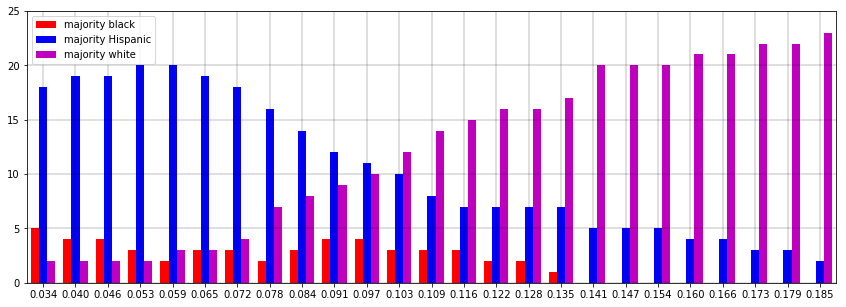

In [10]:
#from matplotlib.basic_units import cm, inch
fig, ax = plt.subplots(figsize=(14.5, 5))
ind = np.arange(0,C*2,2)#[1:]
ax.grid(color='k', linestyle='-', linewidth=0.25)
width = 0.5
p1 = ax.bar(ind, f_added[:,0], width, color='r')
p2 = ax.bar(ind+width, f_added[:,1], width, color='b')
p3 = ax.bar(ind+width*2, f_added[:,2], width, color='m')
#ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
labs = ["%.3f" % round(a,3) for a in TAUS]#[1:]]
ax.set_xticklabels(labs)
#ax.set_yticklabels(np.arange(0,50,5))

plt.yticks(np.arange(0,26,5))
plt.axis([-0.5, C*2-0.5, 0, 25])
ax.legend((p1[0], p2[0], p3[0]), ('majority black', 'majority Hispanic', 'majority white'))
#ax.yaxis.set_units(inch)
#ax.autoscale_view()
#plt.show()
if frac:
    plt.savefig('bar_K25_max_race_alloc_sim5_frac.pdf', bbox_inches='tight')
else:
    plt.savefig('bar_K25_max_race_alloc_sim5.pdf', bbox_inches='tight')

In [ ]:
# fig, ax = plt.subplots(figsize=(0.65, 5))
# ind = np.zeros((1,))#np.arange(0,40,2)
# ax.grid(color='k', linestyle='-', linewidth=0.25)
# width = 0.5
# p1 = ax.bar(ind, u_added[0], width, color='r')
# p2 = ax.bar(ind+width, u_added[1], width, color='b')
# p3 = ax.bar(ind+width*2, u_added[2], width, color='m')
# #ax.set_title('Scores by group and gender')
# ax.set_xticks(ind + width)
# labs = ["%.2f" % round(a,2) for a in TAUS]#np.linspace(0.04, 0.16, 20)]
# ax.set_xticklabels('')#labs)
# #ax.set_yticklabels('')
# #ax.set_yticklabels(np.arange(0,50,5))

# plt.yticks(np.arange(0,51,5))
# plt.axis([-0.5, 1.5, 0, 50])#40, 0, 50])
# #ax.legend((p1[0], p2[0], p3[0]), ('black, unfair', 'hispanic, unfair', 'white, unfair'), loc='upper left')
# #ax.yaxis.set_units(inch)
# #ax.autoscale_view()
# #plt.show()
# plt.savefig('bar_unfair_max_race_alloc_sim5.pdf', bbox_inches='tight')
# #plt.savefig('bar_max_race_alloc_sim5.pdf', bbox_inches='tight')

In [20]:
u_obj

array([[37.22787648]])

In [21]:
f_obj

array([35.22919867, 35.12981961, 35.1851226 , 35.34375382, 35.45846169,
       35.49901529, 35.65775108, 35.90124633, 36.2002202 , 36.21324974,
       36.26936546, 36.33093845, 36.47250444, 36.64884028, 36.71781663,
       36.71781663, 36.75485669, 36.94719527, 37.01434226, 37.01434226,
       37.09455288, 37.09455288, 37.15596705, 37.15596705, 37.22787648])

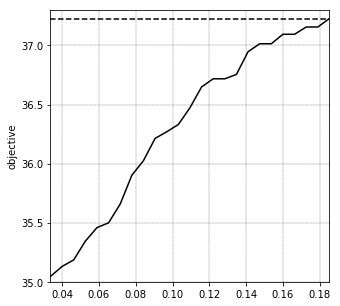

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(TAUS, np.repeat(u_obj[0], len(TAUS)), '--k')
plt.plot(TAUS, f_obj, '-k')
#plt.legend(['unconstrained', 'constrained'], loc='upper left')
ax.grid(color='k', linestyle='--', linewidth=0.25)
plt.axis([TAUS[0], TAUS[-1], 35.0,37.3])
plt.ylabel('objective')
#plt.show()
if frac:
    plt.savefig('max_K25_race_obj_sim5_frac.pdf', bbox_inches='tight')
else:
    plt.savefig('max_K25_race_obj_sim5.pdf', bbox_inches='tight')

In [18]:
u_obj

array([38.112022], dtype=float32)

In [19]:
f_obj

array([ 0.        , 35.12108612, 35.28052902, 35.3115654 , 35.34350586,
       35.75682068, 36.07525253, 36.393116  , 36.63695908, 37.05997086,
       37.58895874, 37.79861832, 37.79861832, 37.79861832, 37.79861832,
       37.79861832, 37.79861832, 37.90341187, 38.00802994, 38.1120224 ])

In [ ]:
A_perc

## Parity

In [2]:
sim=5
TT=1
K = 25
_, _, S, X, A, A_oh, neigh = load.get_data(sim, 0)
n = S.shape[0]
da = A.shape[-1]

# 1. load weights of causal model
DICT = np.load('school_weights_linear_mse_sim' + str(sim) + '_max1_frac.npz')
w = DICT['w'].T
w1 = w[0:da,:]
w2 = w[da:da*2,:]
w3 = w[da*2:da*3,:]
w4 = w[da*3:da*4,:]
neigh = neigh.astype(int)
x1 = X[:,0]
x3 = X[:,2]


bit_mask=np.zeros([2**neigh.shape[1],neigh.shape[1]])
ints=np.arange(2**neigh.shape[1],dtype=np.int)
for i in range(neigh.shape[1]):
    bit_mask[:,i]=ints%2
    ints//=2




def EY_inner(index,solution,a):
    neighS = S[index,neigh[index,:]]
    first  = np.dot(a,w1)*np.max(neighS*x1[neigh[index,:]])
    second = np.dot(a,w2)*np.max(neighS*solution[neigh[index,:]].astype(float))
    third  = np.dot(a,w3)*x3[index]
    fourth = np.dot(a,w4)
    return first + second + third + fourth



filename = 'results/max_parity_k' + str(K) + '_sim' + str(sim) + '_frac' 
timename = 'results/time_parity_k' + str(K) + '_sim' + str(sim) + '_t' + str(1) + '_frac'              
DICT = np.load(filename + '.npz')
u_sol = DICT['sol']
u_obj = 0.0
#u_perc = np.zeros((1,3))
#import pdb
#pdb.set_trace()
for i in range(n):
    u_obj += EY_inner(i,u_sol,A[np.newaxis,i,:])
u_added = np.sum(A[u_sol,:],axis=0)
A_total = np.sum(A, axis=0)
u_perc  = u_added / A_total
u_obj

array([[36.41529299]])

## Minority

In [3]:
_, _, S, X, A, A_oh, neigh = load.get_data(sim, 1)

n = S.shape[0]
da = A.shape[-1]
K=25

# 1. load weights of causal model                                                                                
DICT = np.load('school_weights_linear_mse_sim' + str(sim) + '_max1_frac.npz')                                    
w = DICT['w'].T                                                                                                  
w1 = w[0:da,:]                                                                                                   
w2 = w[da:da*2,:]
w3 = w[da*2:da*3,:]
w4 = w[da*3:da*4,:]
neigh = neigh.astype(int)                                                                                        
x1 = X[:,0]
x3 = X[:,2]

filename = 'results/max_minority_k' + str(K) + '_sim' + str(sim) + '_frac'
timename = 'results/time_minority_k' + str(K) + '_sim' + str(sim) + '_t' + str(1) + '_frac'
DICT = np.load(filename + '.npz')
u_sol = DICT['sol']
u_obj = 0.0
for i in range(n):
    u_obj += EY_inner(i,u_sol,A[np.newaxis,i,:])
u_added = np.sum(A[u_sol,:],axis=0)
A_total = np.sum(A, axis=0)
u_perc  = u_added / A_total
u_obj

array([[33.42921265]])

In [6]:
np.sum(u_sol)

25

In [8]:
A_added = np.sum(A_oh[u_sol,:],axis=0)
A_added

array([ 4., 21.,  0.])

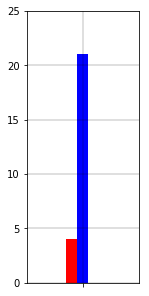

In [32]:
#from matplotlib.basic_units import cm, inch
fig, ax = plt.subplots(figsize=(2, 5))
ind = 1.5#np.arange(0,2,2)#[1:]
ax.grid(color='k', linestyle='-', linewidth=0.25)
width = 0.5
p1 = ax.bar(ind,A_added[0], width, color='r')
p2 = ax.bar(ind+width, A_added[1], width, color='b')
p3 = ax.bar(ind+width*2, A_added[2], width, color='m')
#ax.set_title('Scores by group and gender')
ax.set_xticks([ind + width])
labs = [""]#["%.3f" % round(a,3) for a in TAUS]#[1:]]
ax.set_xticklabels(labs)
#ax.set_yticklabels(np.arange(0,50,5))

plt.yticks(np.arange(0,26,5))
plt.axis([-0.5, 5-0.5, 0, 25])
#ax.legend((p1[0], p2[0], p3[0]), ('majority black', 'majority Hispanic', 'majority white'))
#ax.yaxis.set_units(inch)
#ax.autoscale_view()
#plt.show()
plt.savefig('bar_K25_minority_sim5_frac.pdf', bbox_inches='tight')
#if frac:
#    plt.savefig('bar_K25_max_race_alloc_sim5_frac.pdf', bbox_inches='tight')
#else:
#    plt.savefig('bar_K25_max_race_alloc_sim5.pdf', bbox_inches='tight')

In [9]:
np.arange(0,2,2)

array([0])